<h2> Goal: Find out number of isomers in husermet data </h2>
Then look into how many can be found redundant. Start with positive ion mode

In [17]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import seaborn as sns
%matplotlib inline

In [2]:
# import the data
local_path = '/home/irockafe/Dropbox (MIT)/Alm_Lab/projects/'
project_path = ('/revo_healthcare/data/processed/Husermet_MTBLS97/'+
                'Husermet_UPLCMS_positive_ion_mode.xlsx')
metadata = pd.read_excel(local_path+project_path, sheetname=1,
                        index_col = 0)
peaks = pd.read_excel(local_path+project_path, sheetname=2, index_col=0)
# samples x features
df = pd.read_excel(local_path+project_path, sheetname=3,
                  dtype=np.float64)
# Replace X from df column labels
df.columns = pd.Series([i.replace('X', '') for i in df.columns], 
                       dtype='Int64')

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Columns: 1024 entries, 1000 to 4160
dtypes: float64(1024)
memory usage: 9.3 MB


In [244]:
# Peaks is all the features detected, pre-QC, it seems. Select
# Only those that made it to the dataframe.
print 'df columns', df.columns
print 'peak index', peaks.index

# Sanity check that all the peaks are accounted for in the
# peaklist
for i in df.columns:
    if i not in peaks.index:
        print ("Oh shit, you couldn't find one of the"+
               "df columns in the peaklist index")
        raise hell
    else:
        print "Found {i}".format(i=i)

df columns Int64Index([1000, 1008, 1010, 1013, 1017, 1022, 1026, 1028,  103, 1030,
            ...
            4138,  414, 4140, 4141, 4144, 4147, 4151, 4152, 4153, 4160],
           dtype='int64', length=1024)
peak index Int64Index([  48,   59,   63,   76,   79,   82,   91,   93,  103,  109,
            ...
            7757, 7758, 7761, 7765, 7776, 7780, 7784, 7787, 7798, 7805],
           dtype='int64', name=u'idx', length=2178)
Found 1000
Found 1008
Found 1010
Found 1013
Found 1017
Found 1022
Found 1026
Found 1028
Found 103
Found 1030
Found 1036
Found 1037
Found 1042
Found 1048
Found 1055
Found 1056
Found 1062
Found 1069
Found 1072
Found 1073
Found 1079
Found 1083
Found 1087
Found 1089
Found 109
Found 1090
Found 1093
Found 1099
Found 1100
Found 1101
Found 1102
Found 1108
Found 1110
Found 112
Found 1123
Found 1124
Found 1126
Found 1133
Found 1134
Found 1141
Found 1142
Found 1147
Found 1149
Found 1150
Found 1161
Found 1169
Found 1172
Found 1178
Found 1184
Found 1191
Found 1203
Found 1

Found 3350
Found 3354
Found 3355
Found 3357
Found 3361
Found 3365
Found 3366
Found 3367
Found 3370
Found 3376
Found 3378
Found 3379
Found 338
Found 3383
Found 3388
Found 3390
Found 3391
Found 3399
Found 3403
Found 3410
Found 3417
Found 3419
Found 3428
Found 3433
Found 3437
Found 3441
Found 3442
Found 3443
Found 3448
Found 3451
Found 3453
Found 3456
Found 3467
Found 347
Found 3475
Found 3480
Found 3487
Found 3488
Found 3492
Found 3493
Found 3495
Found 3500
Found 3503
Found 3505
Found 351
Found 3513
Found 3515
Found 3518
Found 352
Found 3522
Found 3523
Found 3525
Found 3534
Found 3536
Found 3540
Found 3542
Found 3547
Found 3549
Found 355
Found 3550
Found 3554
Found 3555
Found 3559
Found 3563
Found 3566
Found 3567
Found 3568
Found 3569
Found 3572
Found 3573
Found 3574
Found 3576
Found 3579
Found 3585
Found 3586
Found 3591
Found 3592
Found 3597
Found 3599
Found 3601
Found 3602
Found 3605
Found 3608
Found 3611
Found 3612
Found 3615
Found 3623
Found 3628
Found 3637
Found 3638
Found 3640
Foun

In [20]:
# Make a matrix of the pairwise-ppm difference between peaks
def pairwise_ppm_matrix(peak_mz):
    '''
    GOAL - Make a matrix containing pairwise ppm differences
           from a pandas series
    INPUT - peak_mz: pandas series with index as feature identifier
    OUTPUT - matrix of pairwise ppm values. half-full with comparisons
            Other (redundant) half is nan values. Using nans so 
            you can ask "ppm_matrix < 20" and sum rows/columns
            to get an answer
    '''
    ppm_pairwise_matrix = pd.DataFrame(
        np.full([len(peak_mz), len(peak_mz)], np.nan),
        index=peak_mz.index, columns=peak_mz.index)
    for i, mz in enumerate(peak_mz):
        for idx, mz2 in enumerate(peak_mz[i+1:]):
            j=i+1+idx # 
            min_ppm = abs(
                        (float(mz-mz2)/max(mz,mz2)) * 10**6)
            ppm_pairwise_matrix.iloc[j,i] = min_ppm
    return ppm_pairwise_matrix

test_mz = pd.Series([1,2,3], index=['a', 'b', 'c'], dtype='float64')
print test_mz
test_val = pairwise_ppm_matrix(test_mz)
should_val = pd.DataFrame({'a': [np.nan, 0.5*10**6, (2.0/3)*10**6],
                          'b': [np.nan, np.nan, (1.0/3)*10**6],
                          'c': [np.nan, np.nan, np.nan]},
                         index=['a', 'b', 'c'])

print '\nOutput from test_vals:\n', test_val
print '\nShould be this:\n', should_val

assert(test_val.all() == should_val.all()).all()
if (test_val.all() == should_val.all()).all():
    print '\n\nYou passed the test! (might be other bugs, but idk)'

a    1.0
b    2.0
c    3.0
dtype: float64

Output from test_vals:
               a              b   c
a            NaN            NaN NaN
b  500000.000000            NaN NaN
c  666666.666667  333333.333333 NaN

Should be this:
               a              b   c
a            NaN            NaN NaN
b  500000.000000            NaN NaN
c  666666.666667  333333.333333 NaN


You passed the test! (might be other bugs, but idk)


In [21]:
# Select out the peaks from dataframe (those that presumably passed QC)
features = peaks.loc[df.columns]
feature_mz = features['mz']

In [15]:
def plot_mz_rt(df, save=False,path=None, rt_bounds=[-1e5,-1e5]):
    # the random data
    x = df['rt']
    y = df['mz']
    print np.max(x)
    print np.max(y)
    nullfmt = NullFormatter()         # no labels

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

    # start with a rectangular Figure
    #fig = plt.figure(1, figsize=(8, 8))
    fig = plt.figure(1, figsize=(10,10))
    
    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # the scatter plot:
    axScatter.scatter(x, y, s=1)

    # now determine nice limits by hand:
    binwidth = 0.25

    #xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])

    #lim = (int(xymax/binwidth) + 1) * binwidth

    x_min = np.min(x)-50
    x_max = np.max(x)+50
    axScatter.set_xlim(x_min, x_max )
    y_min = np.min(y)-50
    y_max = np.max(y)+50
    axScatter.set_ylim(y_min, y_max)

    # Add vertical red line between 750-1050 retention time
    '''
    plt.plot([0,1], [0,1], linestyle = '--', lw=2, color='r',
                        label='Luck', alpha=0.5)
    '''
    print 'ymin: ', y_min
    
    # Add vertical/horizontal lines to scatter and histograms
    axScatter.axvline(x=rt_bounds[0], lw=2, color='r', alpha=0.5)
    axScatter.axvline(x=rt_bounds[1], lw=2, color='r', alpha=0.5)

    #bins = np.arange(-lim, lim + binwidth, binwidth)
    bins = 100
    axHistx.hist(x, bins=bins)
    axHisty.hist(y, bins=bins, orientation='horizontal')

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())

    axScatter.set_ylabel('m/z', fontsize=30)
    axScatter.set_xlabel('Retention Time', fontsize=30)

    axHistx.set_ylabel('# of Features', fontsize=20)
    axHisty.set_xlabel('# of Features', fontsize=20)
    if save:
        plt.savefig(path, 
                format='pdf')
    plt.show()

1189.217979
531.234175
ymin:  46.972084


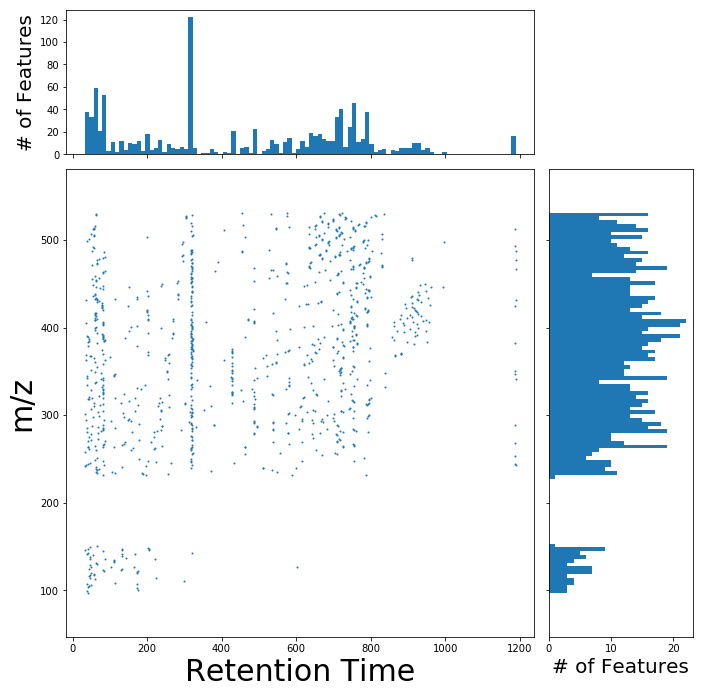

In [16]:
plot_mz_rt(features)

In [22]:
# Do a quick test on own data
ppm_matrix = pairwise_ppm_matrix(feature_mz)

<h2> Only 11 features are within 5ppm of one-another :) </h2>
Unsure how this will stack up between datasets, but 
52 possibly isomeric features out of 1000 is not bad...

Also, there's a distinct possibility that they removed
other redundant features... Check on that below

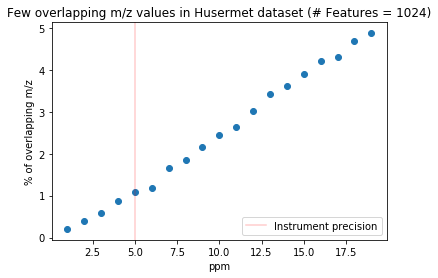

In [23]:
def plot_ppm_overlaps(ppm_matrix, x_vals):
    x = x_vals
    y = (np.array([(ppm_matrix < i).sum().sum() for i in x]) / 
         float(ppm_matrix.shape[0]))*100
    plt.scatter(x,y)
    plt.xlabel('ppm')
    plt.ylabel('% of overlapping m/z')
    plt.title('Few overlapping m/z values in Husermet dataset'
             + ' (# Features = %s)' % ppm_matrix.shape[0])
    plt.axvline(5, color='red', alpha=0.2, label='Instrument precision')
    plt.legend()
    plt.show()
    
plot_ppm_overlaps(ppm_matrix, range(1,20))

In [167]:
# Check how many of the annotated features (peaks?)
# have overlapping m/z
# This takes a long time. Maybe try to matrix-ify some of the code?
all_feats = pairwise_ppm_matrix(peaks['mz'])

<h2> Even for all the features (not just those that were in the dataframe and passed QC), only ~1% are indistinguishable by mass </h2>

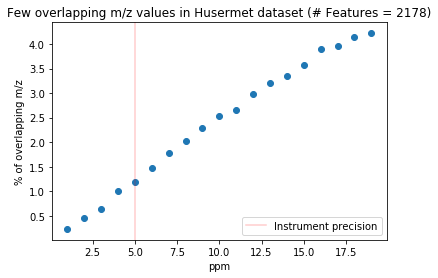

In [173]:
plot_ppm_overlaps(all_feats, range(1,20))

<h2> Now let's see if the distributions of these m/z overlapping features are distinct </h2>
Just work with the QC'd features (those found in the feature table, not those found only in the peaklist)

[(1288, 1287), (1522, 1521), (1740, 1739), (1999, 1998), (2019, 2018), (2020, 2019), (2438, 2437), (3308, 3307), (389, 388), (3928, 3927), (3995, 3994), (4003, 4002)]


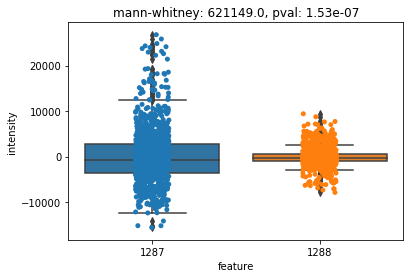

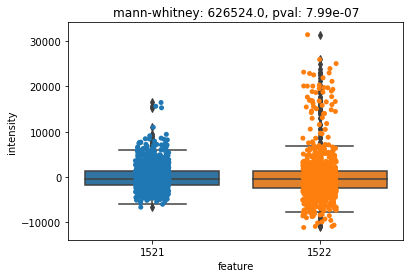

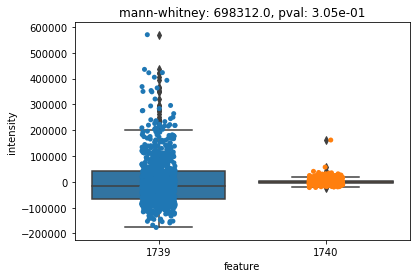

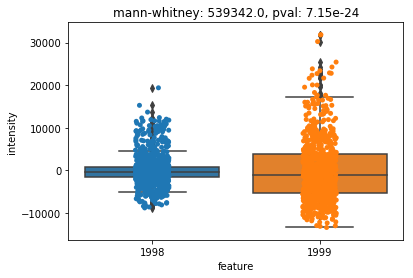

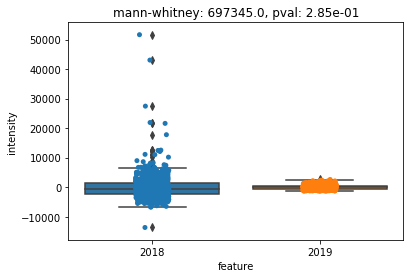

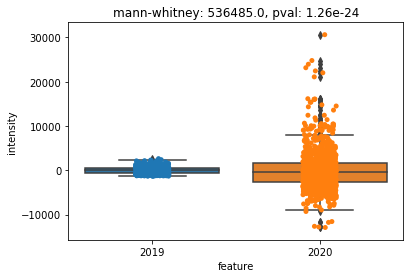

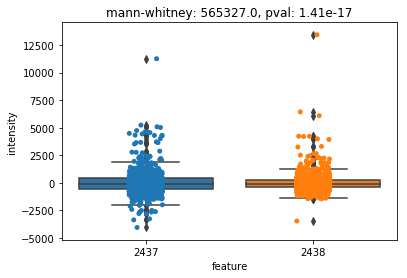

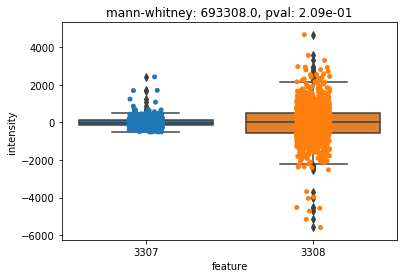

ValueError: arrays must all be same length

In [28]:
# Get the overlapping features...
# Stack() pivots values and drops nan values - yay!
overlapping_mz_pairs = list(ppm_matrix[ppm_matrix < 6].stack().index)
len(overlapping_mz_pairs)
print overlapping_mz_pairs

# write a function to get intensities for these features
def plot_overlapping_mz_intensities(df, feature_pair):
    '''
    GOAL - Take in tuple of feature indices, return Intensity values
        for that pair.
    INPUT - 
        df - pandas dataframe. A feature table with 
            (samples x features), with column
            index that has same index as feature_pair
        feature_pair - Tuple. Contains indexes to get intensity vals
    OUTPUT - 
        Dataframe of (sample, intensity) for each feature pair
    '''
    feats = df[list(feature_pair)]
    
    # convert to tidy data
    tidy_feats = feats.melt(id_vars=feats.index,
              value_vars=feats.columns,
              var_name='feature',
              value_name='intensity').dropna(axis=1, how='all')
    
    # Get mann-whitney values
    u, pval_u = stats.mannwhitneyu(df[feature_pair[0]], df[feature_pair[1]])
    
    # Convert dtype of intensity values! float..?
    sns.boxplot(x='feature', y='intensity',
               data=tidy_feats)
    ax = sns.stripplot(data=tidy_feats,
                       x='feature', y='intensity',
                      jitter=True)
    plt.title("mann-whitney: {u}, pval: {pval:.2e}".format(
        u=u, pval=pval_u))
    plt.show()
    

#TODO fix bug here that says 
# I'm using different-length arrays
for i in range(0,len(overlapping_mz_pairs)):
    plot_overlapping_mz_intensities(df , overlapping_mz_pairs[i])
    

In [252]:
test = pd.DataFrame({'A': [1,2,3], 'B':[10,20,30], 'C':[100,200,300]})
print test
test.melt(id_vars=test.index, value_vars=test.columns,
         var_name='feature', value_name='intensity').dropna(axis=1)

   A   B    C
0  1  10  100
1  2  20  200
2  3  30  300


,feature,intensity
0,A,1
1,A,2
2,A,3
3,B,10
4,B,20
5,B,30
6,C,100
7,C,200
8,C,300
